<a href="https://colab.research.google.com/github/vibhorjoshi/-CHECK/blob/main/redwine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WELCOME TO FULL GUIDE ON K-NEAREST -NEIGHBOR **🤩😎**

1.K-nearest Neighbor, more well known as simply just KNN is a very simple and intuitive machine learning algorithm.

2.I wouldn't say it is a very powerful nor efficient one but it is good to keep it in your arsenal just in case.


3.As usual, I will show you the mathematics behind this intuitive algorithm and end this off with some written code to illustrate you how the algorithm is made.
Now I know I've used the word 'intuitive' twice, but that's for a reason you shall soon see.

1. INTRODUCTION 




I always believe in a top-down approach to learning as you get to learn the basics/big picture before jumping into the tiny details that define this algorithm.

Some notable traits of KNN algorithm is as such

1.It is sensitive to feature scales

2.Can be used for both classification and regression

3.Supervised Learning

4.Non-parametric


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wineQualityReds (1).csv')



In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(10)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
670,6.9,0.400,0.24,2.5,0.083,30.0,45.0,0.99590,3.26,0.58,10.0,5
311,7.9,0.530,0.24,2.0,0.072,15.0,105.0,0.99600,3.27,0.54,9.4,6
465,10.0,0.290,0.40,2.9,0.098,10.0,26.0,1.00060,3.48,0.91,9.7,5
895,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
1208,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0,7
1123,10.7,0.400,0.37,1.9,0.081,17.0,29.0,0.99674,3.12,0.65,11.2,6
327,10.3,0.440,0.50,4.5,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,5
435,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,5
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6


As you can see, we have 11 total features of wine 
The target variable is at the right most column called 'quality'.
It ranges from 0 to 10 with 10 being the best quality and 0 being the worst.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe ()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
print("Shape of dataframe: {}".format(df.shape))

Shape of dataframe: (1599, 12)


As we can see, this dataframe is extremely neat and clean in the sense that it doesn't mean any imputation as it has no null values.

But one thing you have to remember about this algorithm, as I have mentioned above, 
is that KNN algorithm is sensitive to feature scaling as it allocates classes depending on the distances.
    
    Let us go ahead and standardize our features.

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = scale.fit_transform(df) 
scaled_df

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

How about the target variable you may ask

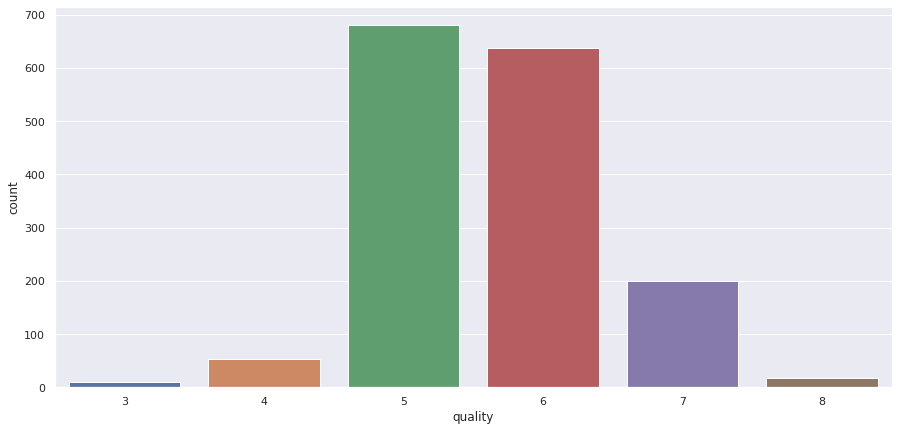

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot('quality', data = df)

As we can see, the majority of the values for quality lies within the 5 to 7 range.

There are no 0, 1, 2, 9 or 10 ratings.

This obvious imbalance and bias towards the 5 to 7 quality is not the most ideal to our machine learning algorithm.

This sampling bias will possibly lead to our model outputting biased results.

The ideal case would be to have all the counts for quality spread out as evenly as possible.

For the time being, let's just keep this fact at the back of our heads and move on.

CODE

Alright! Now I will proceed onto show you how the whole algorithm is written from scratch.

# splitting dataset

Let us first split our dataset.

I know I have said that there is not much training to this simple algorithm, 

but just for convention sake :

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df[:,:-1], np.array(df.iloc[:,-1]), test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1071, 11) (528, 11) (1071,) (528,)


Now that we've got our training and test sets, let us jump into the actual mechanism of KNN


4.2 Calculating Distance

first, the code for calculating the euclidean distance between two points

In [11]:
def euclidean_dist(a,b):
    distance = np.square(a - b) 
    distance = np.sum(distance)
    distance = np.sqrt(distance) 
    return distance

Next, code for obtaining the distance from the test point to all the other points in the training dataset

In [12]:
def distance_from_all_training(test_point):
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_dist(test_point, train_point)
        dist_array = np.append(dist_array,dist)
    return dist_array 

Picking out K closest points

Now the code for combining all of the above into a function that takes in the training dataset

 A set of test features and the number k.

This functino would return us the predictions for each datapoint in the test_feature input.

In [13]:
def KNNClassifier(train_features, train_target, test_features, k = 10):
    predictions = np.array([])
    train_target = train_target.reshape(-1,1)
    for test_point in test_features: 
        dist_array = distance_from_all_training(test_point).reshape(-1,1) 
        neighbors = np.concatenate((dist_array, train_target), axis = 1) 
        neighbors_sorted = neighbors[neighbors[:, 0].argsort()] 
        k_neighbors = neighbors_sorted[:k] 
        frequency = np.unique(k_neighbors[:, 1], return_counts=True)
        target_class = frequency[0][frequency[1].argmax()] 
        predictions = np.append(predictions, target_class)
    
    return predictions 

ACCURACY

Finally, before jumping in to see how our function works, we got to define our code to check the accuracy of our model.

We will come up with a block of code to compare our predictions with the test target features.

In [19]:
def accuracy(y_test,y_preds):
     total_correct=0
     for i in range(len(y_test)):
       if int(y_test[i])==int(y_preds[i]):
         total_correct+=1
         acc=total_correct/len(y_test)#getting the proportion 
         return acc*100

Putting it all together 

In [21]:
preds = KNNClassifier(X_train, y_train, X_test, k = 10)

In [22]:
acc = accuracy(y_test, preds)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 0.19


In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN()
model.fit(X_train, y_train)
preds = model.predict(X_test)

acc = accuracy(y_test, preds)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 0.19


Whao! Do you see that both the accuracies are the same.

Although the accuracy is not that great to start off with, we can't blame our code for it since the Sklearn's one did not fare better.

Let us take one additional step and see how the random forest algorithm fares for this dataset.

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

preds = rf.predict(X_test)

acc = accuracy(y_test,preds)
print('Model accuracy = {:.2f}'.format(acc))

Model accuracy = 0.19
